# Etude du transfert d’oxygène dans le biofilm
Le terme biofilm est utilisé pour représenter une colonie de bactéries vivant dans une matrice polymérique excrétée par les bactéries. Nous considérerons, dans cette étude, le transfert de l’oxygène dissous dans un biofilm d’épaisseur, e, de 500 micromètres déposé sur une surface plane. 
L’oxygène diffuse depuis l’extérieur du biofilm (où il est présent à une concentration, cb de $7~10^{-3}$ mol/L) jusqu’au cœur du biofilm (dans lequel il est consommé par les bactéries). Dans cette première partie, nous considèrerons que la concentration en oxygène à l’interface biofilm/liquide, $c_i$, est égale à la concentration dans la solution, $c_b$.

*Ecrire l’équation qui permettrait de décrire l’évolution de la concentration en oxygène dans le biofilm en régime stationnaire. Définir les conditions limites permettant de décrire au mieux le problème.*  

## Ecriture de l'équation différentielle
Nous sommes en présence d’un phéomène de diffusion de l’oxygène couplé à une consommation de l’oxygène dans le biofilm que nous pouvons assimiler à une réaction homogène. En régime stationnaire et en coordonnées recitilignes, l’application de l’équation de continuité conduit à l’équation différentielle suivante :
$$D\frac{d^{2}c}{dz^{2}}-r=0$$
Où r est la vitesse de réaction de l’oxygène dans le film. La résolution nécessite deux conditions limites qui sont les suivantes :
$$z=0~~~~c=c_b$$
$$z=e~~~~j=0~~soit~~\frac{dc}{dz}=0$$
car il n’y a pas de flux d’oxygène à travers la surface qui supporte le biofilm.

*Ecrire les équations sous forme adimensionnelle et résoudre.*  

## Adimensionnalisation et résolution
Sous forme adimensionnelle, l'équation et les conditions limites s'écrivent :
$$D\frac{d^{2}\hat{c}}{d\hat{z}^{2}}-\frac{k_re^2}{D}\hat{c}=0$$
$$D\frac{d^{2}\hat{c}}{d\hat{z}^{2}}-Ha^2\hat{c}=0$$
Les conditions limites sont alors :
$$\hat{z}=0~~~~\hat{c}=1$$
$$\hat{z}=1~~~~\frac{d\hat{c}}{d\hat{z}}=0$$
Après quelques lignes mathématiques écrites rigoureusement (!), on trouve la solution suivante : 
$$\hat{c}=\frac{cosh(Ha(\hat{z}-1))}{cosh(Ha)}$$

## Calcul du Nombre de Hatta
$$Ha^2=\frac{k_re^2}{D}$$

On considère que les bactéries occupent 30 % en volume du biofilm. On estime que chaque bactérie (qu’on assimilera à une sphère d’un micromètre de diamètre) consomme 4 105 molécules d’O2 par seconde en présence d’une concentration en oxygène dissous de 7 10-3 mol/L. 

*Calculer à partir de ces données, la vitesse de la réaction de consommation de l’oxygène dans le biofilm et en déduire la constante de vitesse de réaction si la réaction de consommation d’oxygène par la bactérie est d’ordre un. *

Soit V le volume de la bactérie et N le nombre d’Avogadro, la consommation par unité de volume de bactérie est de 4.10+5/(N*V) soit 1,26 mol/(s.m3 de bactérie). En considérant la fraction de volume occupée par les bactéries dans le biofilm, cela correspond à une vitesse de réaction homogène de 0,38 mol(s.m3 de biofilm). Si on considère une réaction d’ordre 1, la constante de vitesse est alors de 0,053 s-1. 

*Calculer le nombre sans dimension qui représente le rapport entre la réaction et la diffusion dans l'épaisseur du biofilm.*


In [151]:
import matplotlib.pyplot as plt
import numpy as np
Conso_bact=4.e+5 #molecule O2 /s
Avo=6.022e+23 #molecule/mol
R_bact=1.e-6/2. #m
Vol_bact=4*3.14*(R_bact**3.)/3 #m3
phi_bact=0.3
c_o2=7. #mol.m-3
e=500.e-6 #m
D=1.2e-9 #m2.s-1

#Consommation O2 par unité de volume de bactérie en mol.m-3.s-1
cvbact=Conso_bact/(Avo*Vol_bact)
#Consommation O2 par unité de volume de biofilm en mol.m-3.s-1
cvbiof=cvbact*phi_bact
#Constante de vitesse de consommation de l'O2 dans le biofilm s-1
kr=cvbiof/c_o2
Ha=e*np.sqrt(kr/D)
print ('Hatta=',Ha)

('Hatta=', 3.3663666051626899)


*Définir le flux de matière en oxygène consommé par le biofilm et tracer le profil de concentration.*


## Calcul du flux à l'interface

$$j=-D\frac{dc}{dz}\Bigr|_{z=0}$$
$$j=-\frac{Dc_b}{e}\frac{d\hat{c}}{d\hat{z}}\Bigr|_{\hat{z}=0}$$
$$\hat{j}=\frac{j}{\frac{Dc_i}{e}}=-\frac{d\hat{c}}{d\hat{z}}\Bigr|_{\hat{z}=0}$$
A partir du profil de concentration, on peut définir :
$$\hat{j}=Ha~tanh(Ha)$$


('jhat =', 3.3583556284545795, '-')
('j    =', 5.6420374558036935e-05, 'mol.m-2.s-1')


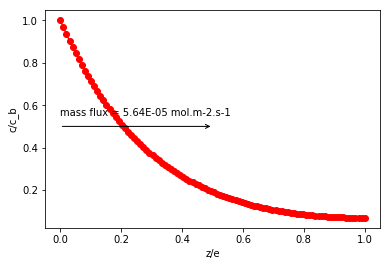

In [152]:
jhat=Ha*np.tanh(Ha)
print('jhat =',jhat, '-')
c_i=7.
j=jhat*D*c_i/e
print ('j    =',j, 'mol.m-2.s-1')
z=np.linspace(0.,1.,100)
c=np.cosh(Ha*(z-1))/np.cosh(Ha)
plt.plot(z,c, 'ro-')
plt.annotate('', xy=(0.5, 0.5), xytext=(0., 0.5),arrowprops=dict(arrowstyle="->"))
plt.text(0., 0.55, 'mass flux = %.2E mol.m-2.s-1'%j)
plt.xlabel('z/e')
plt.ylabel('c/c_b')
plt.show()

## Effet d'une couche limite sur le transfert
On considère maintenant l’effet que peut avoir la vitesse de l’eau au dessus du biofilm sur le transfert en oxygène.   
*Déterminer la concentration à l'interface entre la couche limite de diffusion et le biofilm et en déduire l'expression pour le flux d'oxygène.*

En régime permanent le flux d'oxygène absorbée par le biofilm doit être égal à celui arrivant par diffusion dans la couche limite :
$$j=\frac{Dc_i}{e}Ha~tanh(Ha)=k(c_b-c_i)$$
Cette égalité permet de déterminer la concentration à l'interface ainsi que le flux transféré : 
$$\frac{c_i}{c_b}=\frac{Bi}{Bi+Ha~tanh(Ha)}$$
$$\frac{j}{kc_b}=\frac{1}{1+\frac{Bi}{Ha~tanh(Ha)}}$$

avec un nombre de Biot qui représente le rapport du coefficient de matière dans la couche limite $k=\frac{D_w}{\delta}$ sur le transfert de matière dans le biofilm $\frac{D_b}{e}$
$$Bi=\frac{D_w}{D_f}\frac{e}{\delta}$$

*Déterminer le coefficient de transfert de matière à l'interface si le biofilm est dans un canal ayant un diamètre hydraulique de 1 cm et la vitesse du fluide est de 1 m/s.  
Tracer le profil de concentration et déterminer le flux de matière *

In [153]:
u=1. #m.s-1
d=0.01 #m
ro=1000. #kg.m-3
mu=0.001 #kg.m-1.s-1
Dw=2.e-9 #m2.s-1

re=ro*u*d/mu
sc=mu/(ro*Dw)
print('Reynolds : ', re)
if re<2000 :
    L=1 #m
    sh=1.86*((re*sc*d/L)**0.33)
else :
    sh=0.023*(re**0.8)*(sc**0.33)
print ('Sherwood : ', sh)
k=sh*Dw/d
delta=d/sh
print ('Coefficient de transfert de matière : ', k, 'm/s')
print ('Epaisseur de couche limite massique : ', delta, 'm')

('Reynolds : ', 10000.0)
('Sherwood : ', 283.3922292078881)
('Coefficient de transfert de mati\xc3\xa8re : ', 5.6678445841577614e-05, 'm/s')
('Epaisseur de couche limite massique : ', 3.5286782661440934e-05, 'm')


In [154]:
Bi=Dw*e/(D*delta)
print ('Biot :', Bi)
chat=Bi/(Bi+Ha*np.tanh(Ha))
c_i=chat*c_b
print ('Concentration à l interface, ci =', c_i, '    mol.m-3')
j_f=k*(c_b-c_i)
j_b=D*c_i*Ha*np.tanh(Ha)/e
print ('Flux d oxygene consomme      j  =', j_f, 'mol.m-2.s-1')

('Biot :', 23.616019100657343)
('Concentration \xc3\xa0 l interface, ci =', 6.1284880693152584, '    mol.m-3')
('Flux d oxygene consomme      j  =', 4.9395941763603873e-05, 'mol.m-2.s-1')


Profil de concentration dans la couche limite puis dans le biofilm


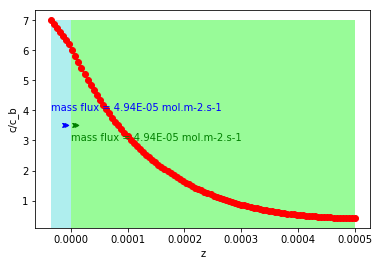

Densité de flux d oxygene (permet de vérifier la continuité du flux à l interface)


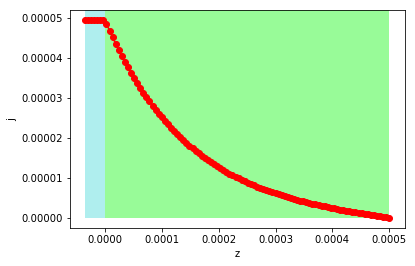

In [155]:
import matplotlib.patches as mpatches
z=np.linspace(-delta,e,100)
c=c_i*np.cosh(Ha*((z/e)-1))/np.cosh(Ha)
c=np.where(z > 0., c, c_i+(c_i-c_b)*z/delta) 
jz=-(D*c_i/e)*Ha*np.sinh(Ha*((z/e)-1))/np.cosh(Ha)
jz=np.where(z > 0., jz, k*(c_b-c_i)) 
print ('Profil de concentration dans la couche limite puis dans le biofilm')
fig,ax = plt.subplots(1)
plt.plot(z,c, 'ro-')
plt.annotate('', xy=(0, c_b/2), xytext=(-delta/2, c_b/2),arrowprops=dict(arrowstyle="fancy",color='blue'))
plt.text(-delta, 0.5+c_b/2, 'mass flux = %.2E mol.m-2.s-1'%j_f,color='blue')
plt.annotate('', xy=(delta/2,c_b/2), xytext=(0, c_b/2),arrowprops=dict(arrowstyle="fancy",color='green'))
plt.text(0, c_b/2-0.5, 'mass flux = %.2E mol.m-2.s-1'%j_b,color='green')
rectb = mpatches.Rectangle([0, 0], e, c_b, fc="palegreen")
rectf = mpatches.Rectangle([0, 0], -delta, c_b, fc="paleturquoise")
ax.add_patch(rectb)
ax.add_patch(rectf)
plt.xlabel('z')
plt.ylabel('c/c_b')
plt.show()
print ('Densité de flux d oxygene (permet de vérifier la continuité du flux à l interface)')
fig2,ax = plt.subplots(1)
plt.plot(z,jz, 'ro-')
rectb = mpatches.Rectangle([0, 0], e, c_b, fc="palegreen")
rectf = mpatches.Rectangle([0, 0], -delta, c_b, fc="paleturquoise")
ax.add_patch(rectb)
ax.add_patch(rectf)
plt.xlabel('z')
plt.ylabel('j')
plt.show()

Vous pouvez refaire les calculs pour differentes valeurs de vitesse d'agitation autour du biofilm, pour différentes vitesses de consommation d'oxygène pour les bactéries pour bien comprendre les phénomènes de transport.